
## GPU BENCHMARKING



**importing dependencies**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#check if this has an gpu
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

**loading the dataset**

In [4]:
# Our dataset contains 60000 small training images that belongs to one of the below 10 classes
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [7]:
X_train.shape
#50000 training images - 32x32 pixels - 3 colors channels RGB

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [9]:
#first 5 images
y_train[0:5]

#frog, truck, truck, cat, automobile

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

**data visualization**

In [14]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

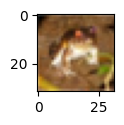

In [11]:
plot_sample(0)

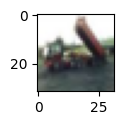

In [15]:
plot_sample(2)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
#lets find what the 2nd image
y_train[2] #returns an array

array([9], dtype=uint8)

In [20]:
classes[y_train[2][0]]

'truck'

**scaling the images/numpy array of images** <br>
scaling is neccessary to improve accuracy and well training of the model.<br>
RGB pixel are from 0-255, so /255 to convert to range 0-1.

In [21]:
#scale X_train and X_test but not Y, cuz its the ultimate label
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [23]:
#one hot encoding :: first once is class index 6, so create an array of size 10(num of classes) where 6th element will be 1 and rest 0s.
#tensorflow API :: keras.utils.to_categoricals()

In [26]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_train_categorical[:5] #6, 9, 9, 4, 1

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

y_test_categorical[:5] #3, 8, 8, 0, 6

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

**ANN model building and training**


In [29]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)), #input layer :: 32x32, 3 color channel images
        keras.layers.Dense(3000, activation='relu'), #hidden layer1 :: flattening 3d array of 32x32x3 into 3000
        keras.layers.Dense(1000, activation='relu'), #hidden layer2 :: 3000 to 1000 nodes
        keras.layers.Dense(10, activation='sigmoid') #output layer :: 10 classes
    ])

#categorical crossentropy is used with one-hot encoding and sparse categorical crossentropy with discrete values
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8109 - accuracy: 0.3549
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6223 - accuracy: 0.4284
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5443 - accuracy: 0.4549
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4806 - accuracy: 0.4753
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4322 - accuracy: 0.4940
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3876 - accuracy: 0.5116
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3518 - accuracy: 0.5270
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3157 - accuracy: 0.5395
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2823 - accuracy: 0.5498
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.25

**making predictions**

In [32]:
index = np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


In [35]:
classes[y_test[0][0]]

'cat'

In [33]:
classes[index]

'cat'

**MEASURE TIMINGS FOR CPU & GPU**

In [36]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

with CPU

In [37]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 133s 85ms/step - loss: 1.8112 - accuracy: 0.3526
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


with GPU

In [38]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8108 - accuracy: 0.3543
11.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


PERFORMANCE COMPARISION
<br>
GPU :: 11.4 secs<br>
CPU :: 143 secs